In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [5]:
data.dropna(inplace=True)

In [6]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [9]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [11]:
X_in = data_in.iloc[:,:-1]
X_in

,FedFunds,Unemployment,HousingStarts
1959-01-01,2.48,6.0,1657.0
1959-02-01,2.43,5.9,1667.0
1959-03-01,2.80,5.6,1620.0
1959-04-01,2.96,5.2,1590.0
1959-05-01,2.90,5.1,1498.0
...,...,...,...
1997-07-01,5.52,4.9,1437.0
1997-08-01,5.54,4.8,1390.0
1997-09-01,5.54,4.9,1546.0
1997-10-01,5.50,4.7,1520.0


In [12]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [13]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [14]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph from your model

In [19]:
model1.predict(X_in)

1959-01-01    6.086958
1959-02-01    6.028998
1959-03-01    5.892141
1959-04-01    5.694345
1959-05-01    5.685971
                ...   
1997-07-01    6.624338
1997-08-01    6.596954
1997-09-01    6.578110
1997-10-01    6.486781
1997-11-01    6.440060
Length: 467, dtype: float64

In [20]:
model1.predict(X_out)

1997-12-01    6.466981
1998-01-01    6.435166
1998-02-01    6.406797
1998-03-01    6.468046
1998-04-01    6.270275
                ...   
2017-01-01    7.280086
2017-02-01    7.191062
2017-03-01    7.122980
2017-04-01    7.146462
2017-05-01    7.139713
Length: 234, dtype: float64

In [17]:
import matplotlib.pyplot as plt

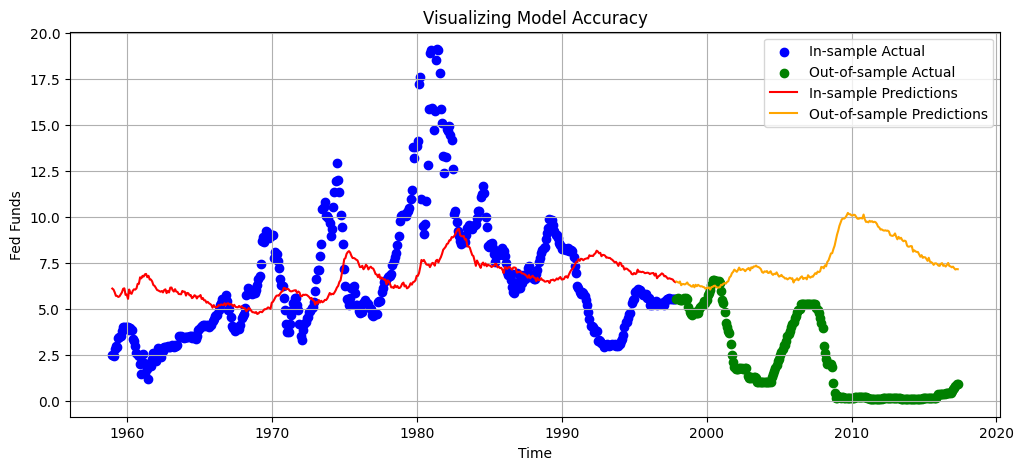

In [56]:
plt.figure(figsize = (12,5))

###
plt.scatter(data_in.index,y_in,color='blue')
plt.scatter(data_out.index,y_out, color='green')
plt.plot(model1.predict(X_in), color='red')
plt.plot(model1.predict(X_out),color='orange')
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(['In-sample Actual','Out-of-sample Actual','In-sample Predictions','Out-of-sample Predictions'])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [36]:
from sklearn.metrics import mean_squared_error

In [44]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in), squared=True)
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out), squared=True)

In [45]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures()

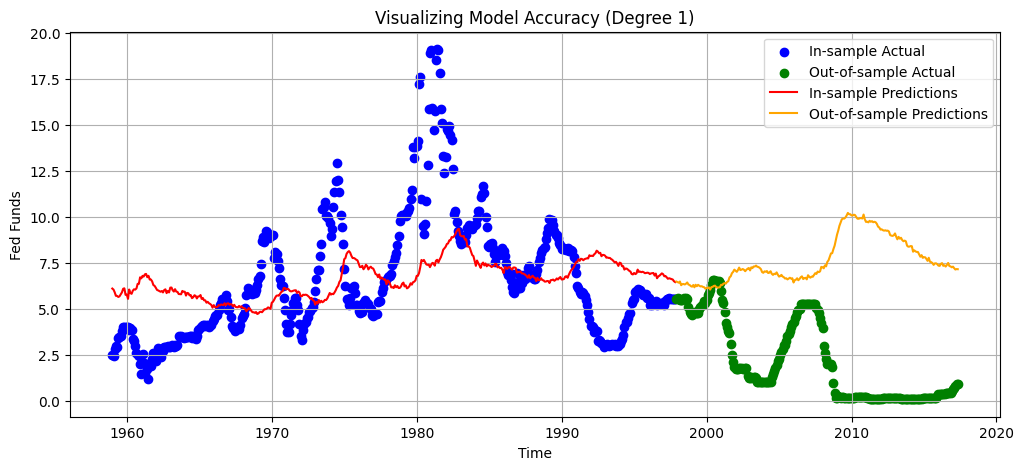

Insample MSE :  10.071
Outsample MSE :  40.361


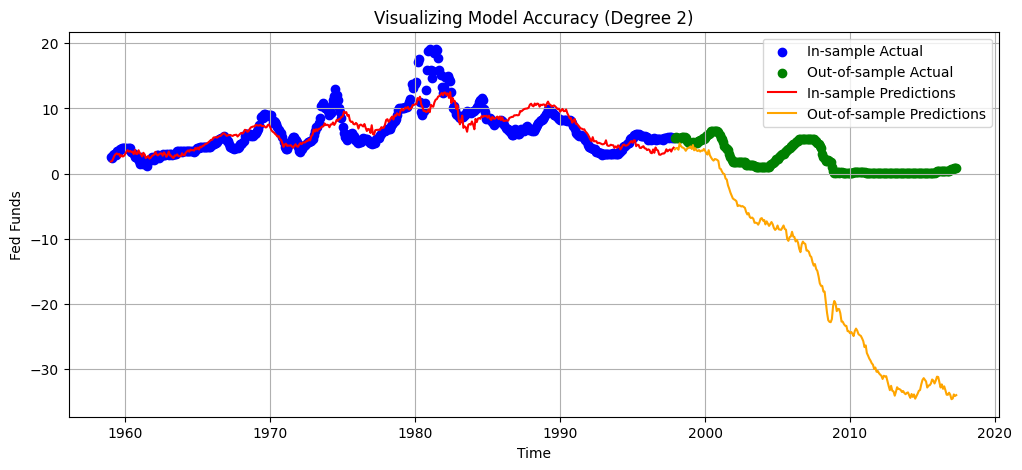

Insample MSE :  3.863
Outsample MSE :  481.447


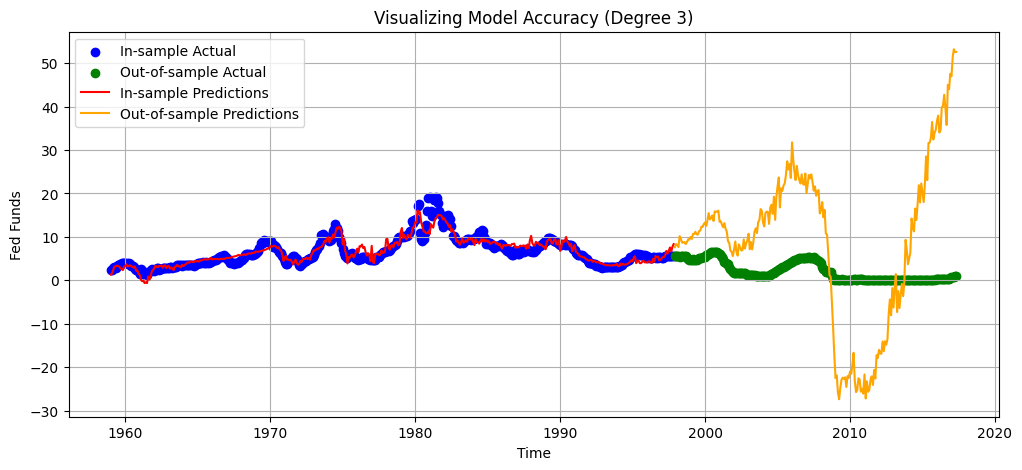

Insample MSE :  1.872
Outsample MSE :  371.767


In [88]:
degrees = [1, 2, 3]

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model = sm.OLS(y_in, sm.add_constant(X_in_poly)).fit()
    
    
    
    plt.figure(figsize = (12,5))

    ###
    plt.scatter(data_in.index,y_in,color='blue')
    plt.scatter(data_out.index,y_out, color='green')
    plt.plot(data_in.index,model.predict(X_in_poly), color='red')
    plt.plot(data_out.index,model.predict(X_out_poly),color='orange')
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title(f"Visualizing Model Accuracy (Degree {degree})")
    plt.legend(['In-sample Actual','Out-of-sample Actual','In-sample Predictions','Out-of-sample Predictions'])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(y_in, model.predict(X_in_poly), squared=True)
    out_mse_1 = mean_squared_error(y_out, model.predict(X_out_poly), squared=True)
    
    print("Insample MSE : ", round(in_mse_1,3))
    print("Outsample MSE : ", round(out_mse_1,3))

# 7.) State your observations :

In Sample MSE: As the model increases in complexity (more degrees of the polynomial), the in sample error, as measured by the MSE (mean squared error) decreases. This makes sense because the polynomial makes the model more flexible so it can optimize better in sample.

Out of sample MSE: As the degrees of the polynomial increase, the out of sample performance worsens. The model is overfitting the data so the predictions have more variance.

This is an usual bias-variance tradeoff.

The next plot presents the Root Mean Squared Error (root to improve the scale) for in sample and out of sample for different degrees of the polynomial. We can see better the loss in performance for the out of sample.

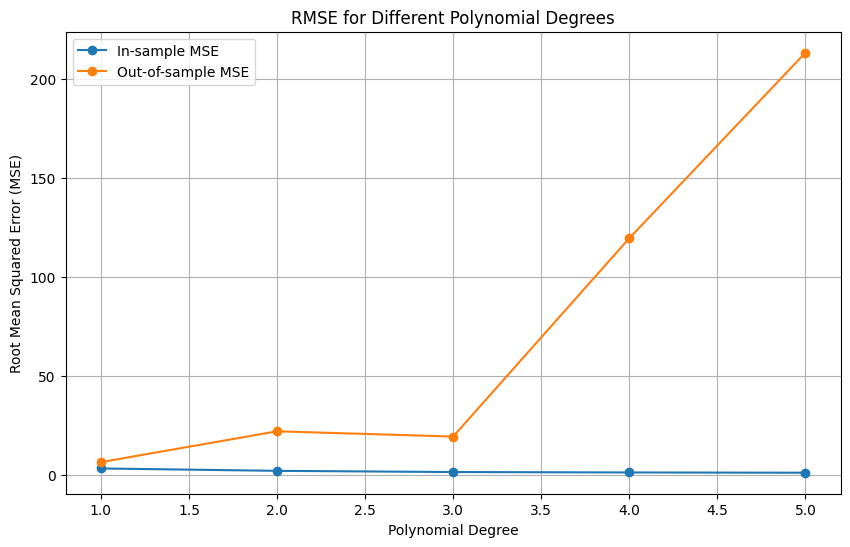

In [86]:
degrees = np.arange(1, 6)
in_mse_list = [] 
out_mse_list = [] 

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model = sm.OLS(y_in, sm.add_constant(X_in_poly)).fit()
    
    in_mse = mean_squared_error(y_in, model.predict(X_in_poly), squared=False)
    out_mse = mean_squared_error(y_out, model.predict(X_out_poly), squared=False)
    
    in_mse_list.append(in_mse)
    out_mse_list.append(out_mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(degrees, in_mse_list, label='In-sample MSE', marker='o')
plt.plot(degrees, out_mse_list, label='Out-of-sample MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error (MSE)')
plt.title('RMSE for Different Polynomial Degrees')
plt.legend()
plt.grid(True)
plt.show()
